# Decision Tree Regression Model
---

### Setup

In [1]:
from sklearn.tree import plot_tree, DecisionTreeRegressor
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
start = time.time()

# reading already split data
xtrain = pd.read_csv("../data/84206/xTrain.csv")
xtest = pd.read_csv("../data/84206/xTest.csv")
ytrain = pd.read_csv("../data/84206/yTrain.csv")
ytest = pd.read_csv("../data/84206/yTest.csv")

# Get our data to numpy arrays
xtrain = xtrain.to_numpy()
ytrain = ytrain.to_numpy()
xtest = xtest.to_numpy()
ytest = ytest.to_numpy()

# Print the shape of our data
print("xtrain shape:", xtrain.shape)
print("ytrain shape:", ytrain.shape)

xtrain shape: (7001, 4)
ytrain shape: (7001, 1)


### Model

In [3]:
# Create the model and fit our training data to it
tree = DecisionTreeRegressor(criterion = "friedman_mse", min_samples_leaf=2, max_depth = 100)
tree.fit(xtrain, ytrain)

# Use the trained model on the testing and training data
testPred = tree.predict(xtest)
trainPred = tree.predict(xtrain)

### Measuring Accuracy

#### R2 Score
How well the variation of the predicted matches the variation in the actual (0-1)

In [4]:
trainr2 = r2_score(trainPred, ytrain)
testr2 = r2_score(testPred, ytest)

print("Train R2: ", trainr2)
print("Test R2: ", testr2)

Train R2:  0.7681879432531623
Test R2:  0.7675886587871055


#### Graphing

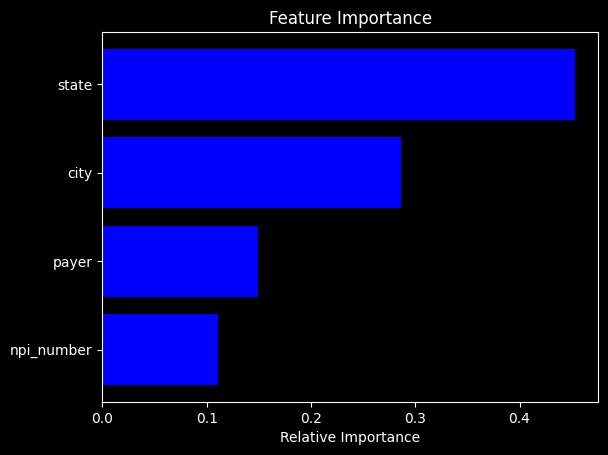

In [5]:
importances = tree.feature_importances_
indices = np.argsort(importances)

# graph of feature importance
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), ("npi_number","payer","city","state"))
plt.xlabel('Relative Importance')
plt.show()

Time Elapsed:  8.9013512134552


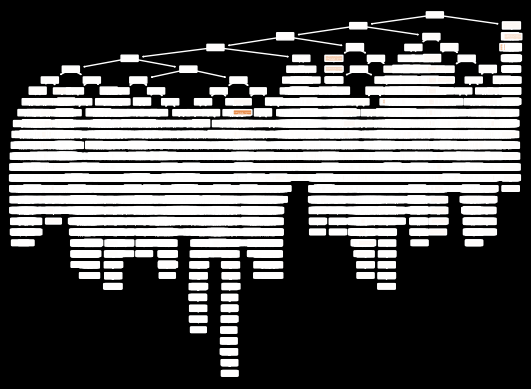

In [6]:
# graph of decision tree created
plot_tree(tree, feature_names=["npi_number","payer","city","state"], filled=True, rounded=True)
timeElapsed = time.time() - start

print("Time Elapsed: ", timeElapsed)

plt.show()